<a href="https://colab.research.google.com/github/TranQuocDuy123/TranQuocDuy123/blob/main/nhan_dien_10_trai_cay_nhiet_doi_o_viet_nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/baitapvenha2/traicay/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 622 images belonging to 10 classes.


In [ ]:
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/baitapvenha2/traicay/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 69 images belonging to 10 classes.


In [ ]:
training_data.class_indices

{'bo': 0,
 'chanh': 1,
 'chomchom': 2,
 'chuoi': 3,
 'duahau': 4,
 'mangcut': 5,
 'nho': 6,
 'saurieng': 7,
 'thanhlong': 8,
 'vusua': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history=model.fit(training_data,epochs=500,batch_size=100,verbose=1, validation_data=validation_data, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/500
20/20 [==============================] - 10s 428ms/step - loss: 2.8838 - accuracy: 0.2026 - val_loss: 2.2260 - val_accuracy: 0.2899
Epoch 2/500
20/20 [==============================] - 8s 398ms/step - loss: 2.1804 - accuracy: 0.2701 - val_loss: 2.1424 - val_accuracy: 0.2899
Epoch 3/500
20/20 [==============================] - 8s 404ms/step - loss: 2.1760 - accuracy: 0.2701 - val_loss: 2.1500 - val_accuracy: 0.2899
Epoch 4/500
20/20 [==============================] - 8s 400ms/step - loss: 2.1360 - accuracy: 0.2701 - val_loss: 2.1010 - val_accuracy: 0.2899
Epoch 5/500
20/20 [==============================] - 8s 402ms/step - loss: 2.0851 - accuracy: 0.2653 - val_loss: 2.0609 - val_accuracy: 0.2899
Epoch 6/500
20/20 [==============================] - 8s 406ms/step - loss: 2.1249 - accuracy: 0.2572 - val_loss: 2.1418 - val_accuracy: 0.2609
Epoch 7/500
20/20 [==============================] - 8s 405ms/step - loss: 2.0701 - accuracy: 0.2653 - val_loss: 2.0620 - val_accuracy: 0.289

In [ ]:
Score=model.evaluate(validation_data,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 2.5014240741729736
Test accuary 0.5072463750839233


<function matplotlib.pyplot.show>

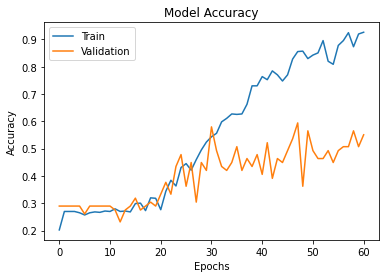

In [ ]:
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Train','Validation'])
  plt.show

In [ ]:
model.save("Final_Fruits.h5")

In [ ]:
model_CNN=load_model('Final_Fruits.h5')

chanh


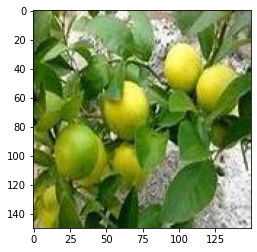

In [ ]:

img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/chanh/15.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

chomchom


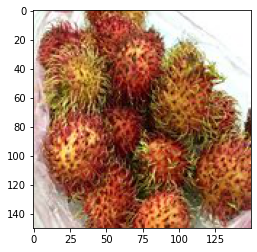

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/chomchom/Image_3.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

chuoi


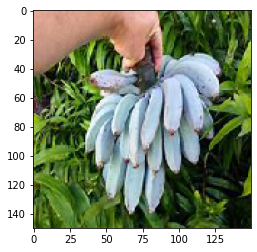

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/chuoi/168.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

duahau


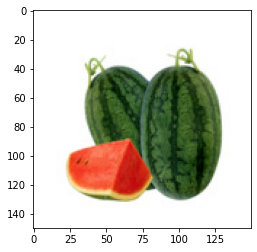

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/duahau/image 10.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

mangcut


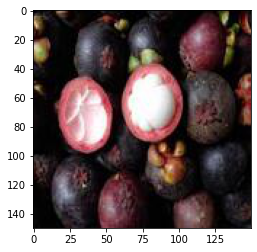

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/mangcut/Cut43.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

nho


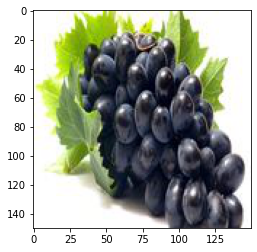

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/nho/image 14.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

saurieng


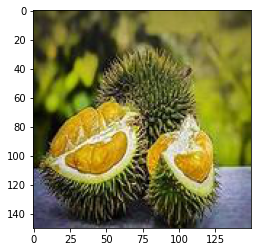

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/saurieng/21.jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

thanhlong


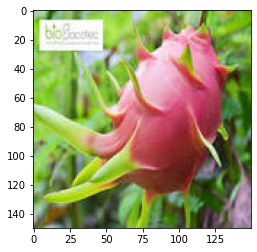

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/thanhlong/Thanh_long (12).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)

vusua


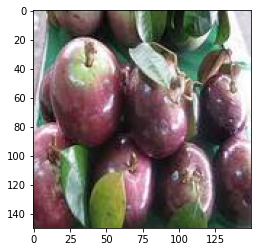

In [ ]:
img=load_img('/content/drive/MyDrive/baitapvenha2/traicay/test/vusua/Vu_sua (70).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='bo'
elif round(result[0][1])==1:
  prediction='chanh'
elif round(result[0][2])==1:
  prediction='chomchom'
elif round(result[0][3])==1:
  prediction='chuoi'
elif round(result[0][4])==1:
  prediction='duahau'
elif round(result[0][5])==1:
  prediction='mangcut'
elif round(result[0][6])==1:
  prediction='nho'
elif round(result[0][7])==1:
  prediction='saurieng'
elif round(result[0][8])==1:
  prediction='thanhlong'
elif round(result[0][9])==1:
  prediction='vusua'
print(prediction)